In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
df = pd.read_csv('heart.csv')

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
# EDA
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


1= people with heart disease
0=safe

In [20]:
# to find how many of each class are there
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

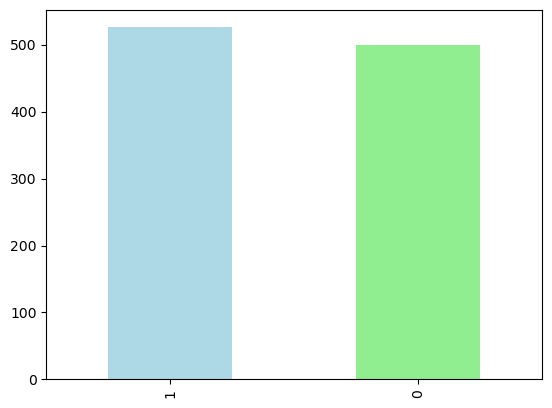

In [21]:
df['target'].value_counts().plot(kind='bar', color =['lightblue', 'lightgreen']);

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [23]:
#checking if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


0=Female
1=male

In [25]:
# Heart disease frequency acc to sex
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [26]:
#comparison
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


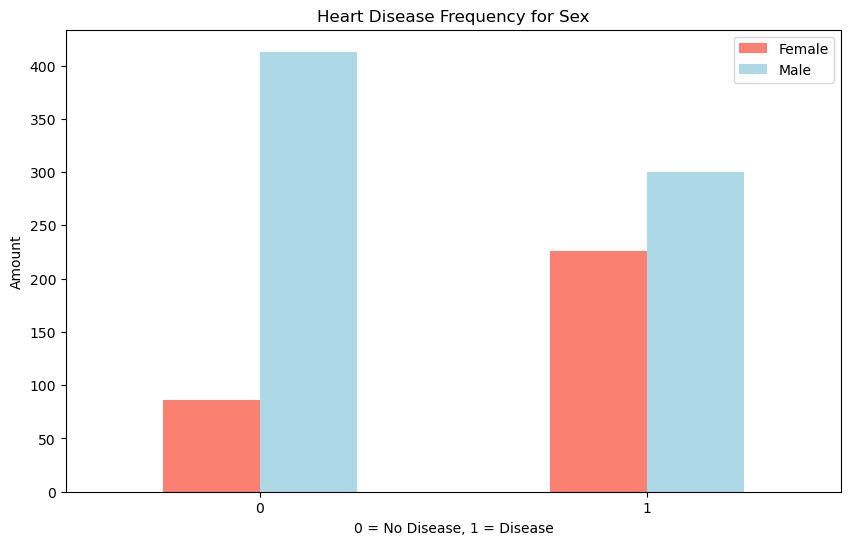

In [27]:
# creating a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

thalach=max heart rate

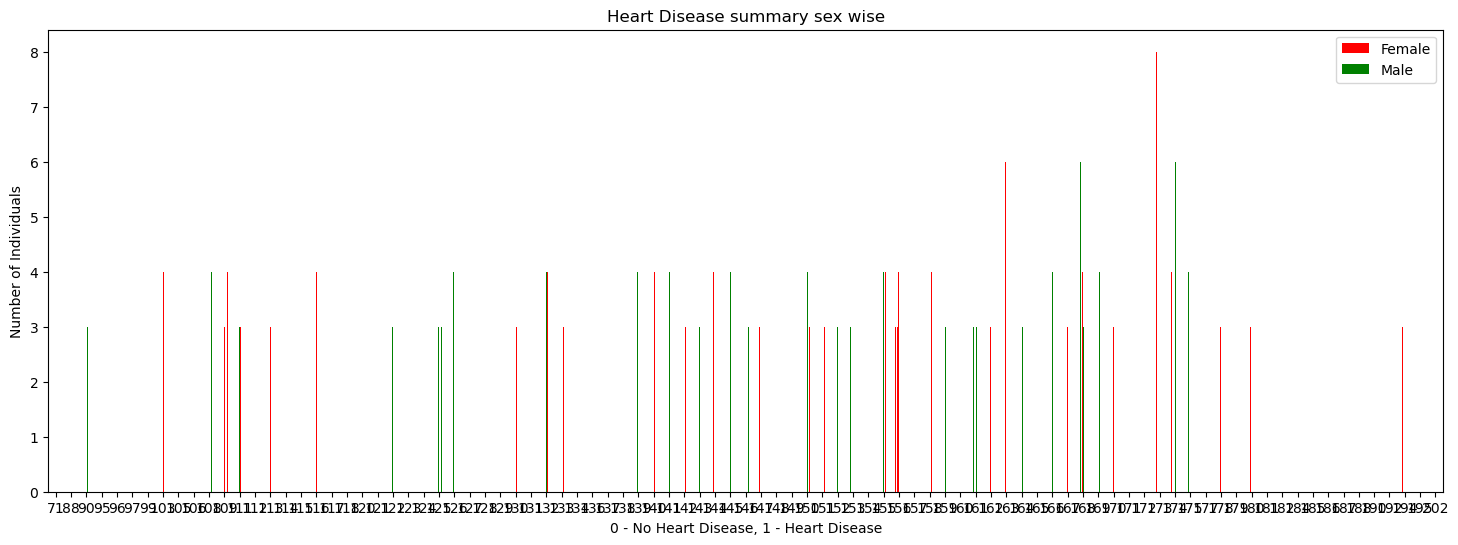

In [28]:
# Assuming df is your DataFrame
pd.crosstab(df['thalach'], df['age']).plot(kind='bar', figsize=(18, 6), color=['red', 'green'])

plt.title('Heart Disease summary sex wise')
plt.xlabel('0 - No Heart Disease, 1 - Heart Disease')
plt.ylabel('Number of Individuals')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)  

plt.show()


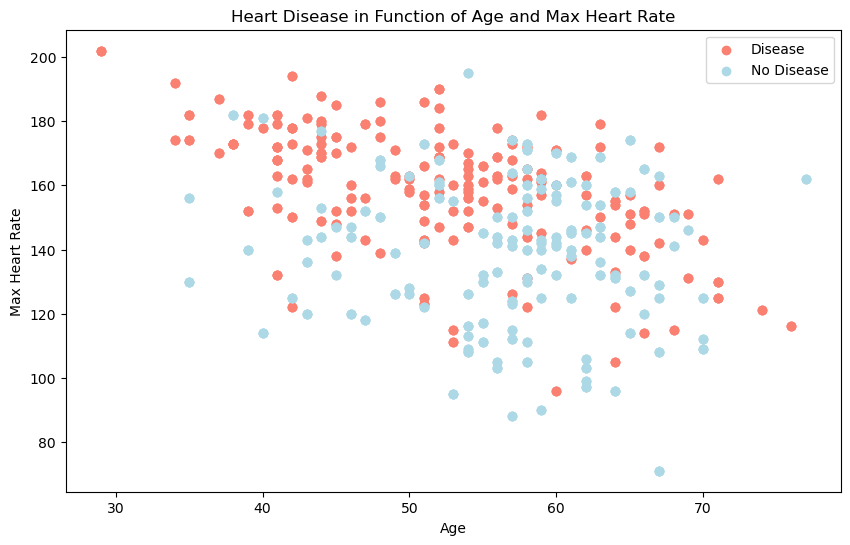

In [29]:
#Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# Scatter with negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue');

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [30]:
df.age[df.target==1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

<Axes: ylabel='Frequency'>

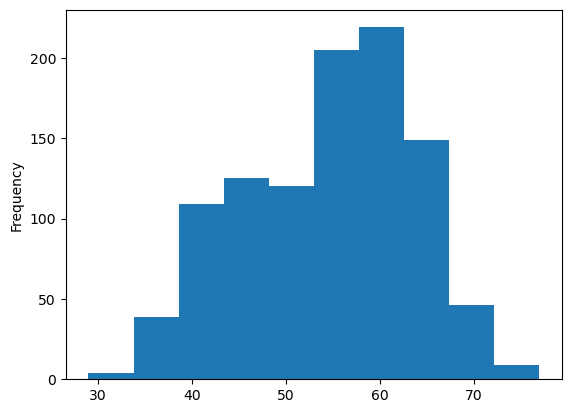

In [31]:
#using histogram
df.age.plot.hist()

cp =chest pain
0=Typical angina- chest pain due to decrease  blood pressure.
1=atypical angina- chest pain not related to heart problem,
2=non-anginal pain- not heart related 
3=asymptomatic: chest pain not showing heart problem

In [32]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


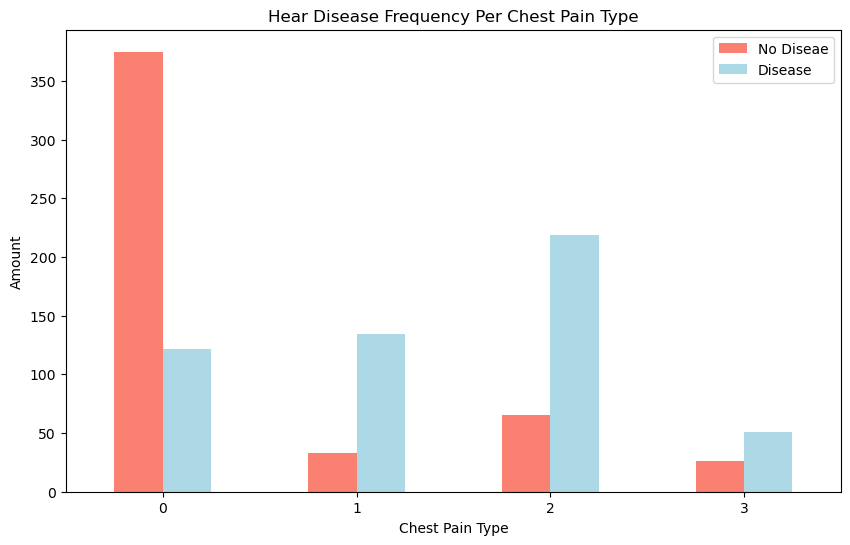

In [33]:
#visuals
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])
# Add some communication

plt.title("Hear Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Diseae", "Disease"])
plt.xticks(rotation=0);

In [19]:
#correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


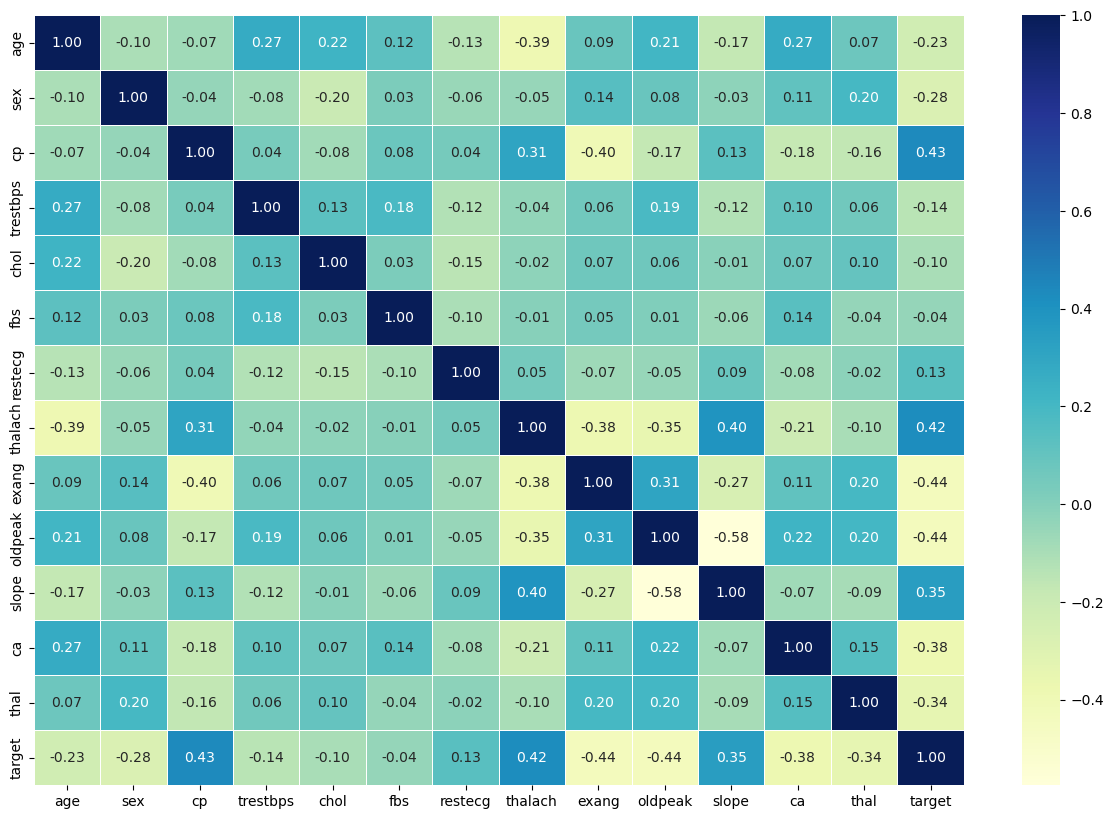

In [20]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                 cmap='YlGnBu');

In [34]:
#training and testing
np.random.seed(50)

X = df.drop('target', axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
585,40,1,3,140,199,0,1,178,1,1.4,2,0,3
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3
612,58,0,0,170,225,1,0,146,1,2.8,1,2,1
746,64,1,2,140,335,0,1,158,0,0.0,2,0,2
863,52,1,0,125,212,0,1,168,0,1.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,59,1,0,170,326,0,0,140,1,3.4,0,0,3
132,41,1,1,135,203,0,1,132,0,0.0,1,0,1
990,56,1,1,120,236,0,1,178,0,0.8,2,0,2
289,40,1,0,152,223,0,1,181,0,0.0,2,0,3


In [36]:
y_train

585    1
479    0
612    0
746    0
863    0
      ..
70     0
132    1
990    1
289    0
109    0
Name: target, Length: 820, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


# Increase the number of iterations (e.g., to 10000)
logistic_regression = LogisticRegression(max_iter=1000000)

# Create instances of the models
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()

# Fit the models on the training data
logistic_regression.fit(X_train, y_train)
knn.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions on the test data
logistic_regression_predictions = logistic_regression.predict(X_test)
knn_predictions = knn.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)

# Calculate precision, recall, and F1 score for each model
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions)

knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)

# Print the precision, recall, and F1 score for each model in a neat format
print("Logistic Regression:")
print(f" Precision: {logistic_regression_precision:.2f}")
print(f" Recall:  {logistic_regression_recall:.2f}")
print(f" F1 Score: {logistic_regression_f1:.2f}")
print("\nK-Nearest Neighbors:")
print(f" Precision: {knn_precision:.2f}")
print(f" Recall:  {knn_recall:.2f}")
print(f" F1 Score: {knn_f1:.2f}")
print("\nRandom Forest:")
print(f" Precision: {random_forest_precision:.2f}")
print(f" Recall:  {random_forest_recall:.2f}")
print(f" F1 Score: {random_forest_f1:.2f}")


C:\Users\ranga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
 Precision: 0.79
 Recall:  0.90
 F1 Score: 0.84

K-Nearest Neighbors:
 Precision: 0.78
 Recall:  0.75
 F1 Score: 0.76

Random Forest:
 Precision: 1.00
 Recall:  1.00
 F1 Score: 1.00


In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Print the accuracy for each model
print("Logistic Regression:")
print(f" Accuracy: {logistic_regression_accuracy:.2f}")
print("\nK-Nearest Neighbors:")
print(f" Accuracy: {knn_accuracy:.2f}")
print("\nRandom Forest:")
print(f" Accuracy: {random_forest_accuracy:.2f}")



Logistic Regression:
 Accuracy: 0.81

K-Nearest Neighbors:
 Accuracy: 0.75

Random Forest:
 Accuracy: 1.00


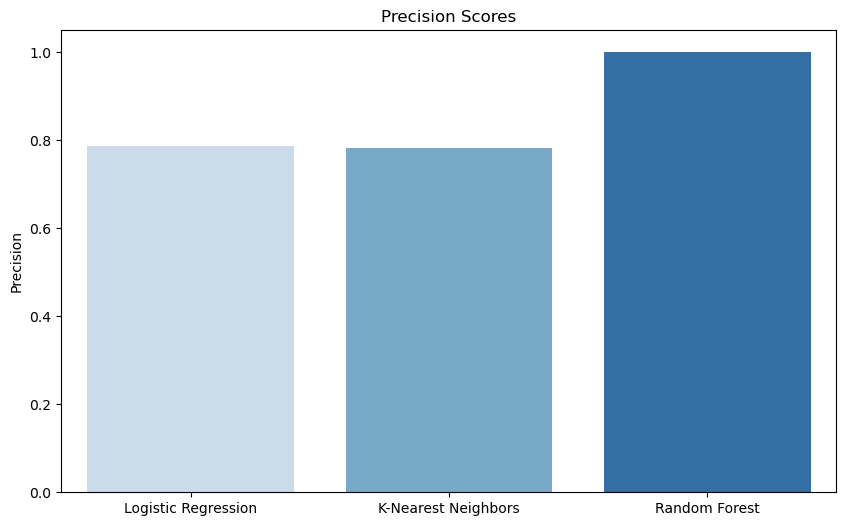

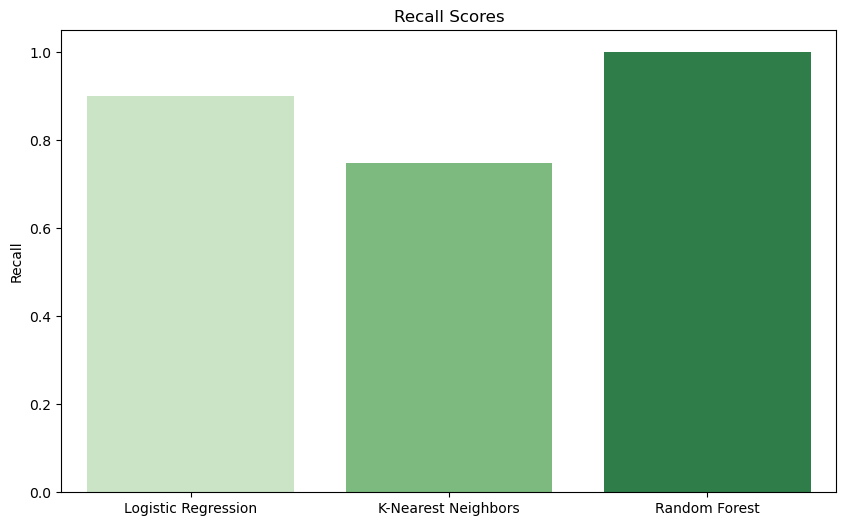

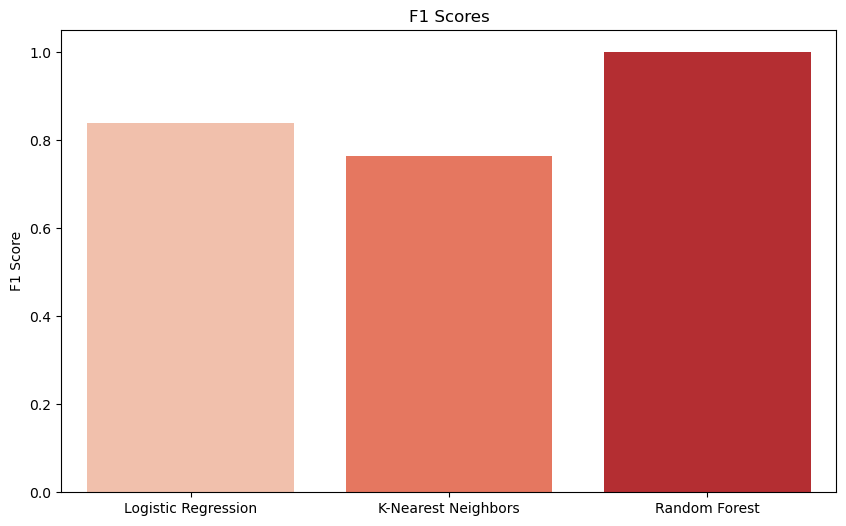

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models' names and their corresponding metric values
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']
precision_scores = [logistic_regression_precision, knn_precision, random_forest_precision]
recall_scores = [logistic_regression_recall, knn_recall, random_forest_recall]
f1_scores = [logistic_regression_f1, knn_f1, random_forest_f1]

# Create a bar plot for precision scores using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precision_scores, palette="Blues")
plt.title("Precision Scores")
plt.ylabel("Precision")
plt.xticks(rotation=0)
plt.show()

# Create a bar plot for recall scores using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=recall_scores, palette="Greens")
plt.title("Recall Scores")
plt.ylabel("Recall")
plt.xticks(rotation=0)
plt.show()

# Create a bar plot for F1 scores using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette="Reds")
plt.title("F1 Scores")
plt.ylabel("F1 Score")
plt.xticks(rotation=0)
plt.show()


In [104]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions
predictions = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the evaluation metrics
print("AdaBoost Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



AdaBoost Metrics:
Accuracy: 0.91
Precision: 0.93
Recall: 0.89
F1 Score: 0.91


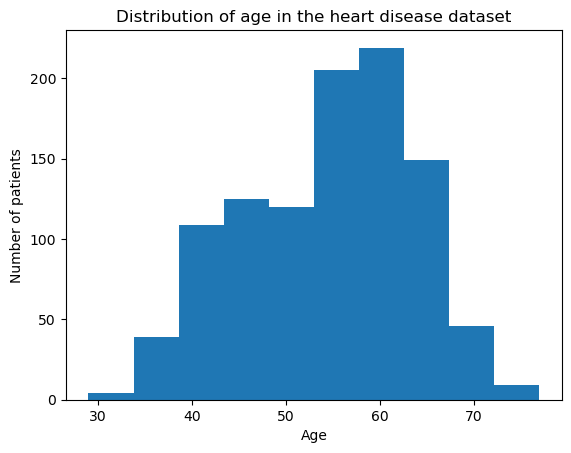

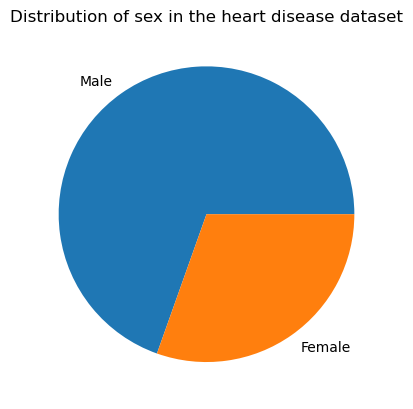

In [40]:

# Distribution of age
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Distribution of age in the heart disease dataset')
plt.show()

# Distribution of sex
plt.pie(df['sex'].value_counts(), labels=['Male', 'Female'])
plt.title('Distribution of sex in the heart disease dataset')
plt.show()